In [1]:
%%capture
cd ..

In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [3]:
import time
dfs=[]
for infile in glob.glob('data/china_stock/*.csv'):
    df = pd.read_csv(infile, parse_dates=['date'])
#     print(df)
    df['timestamp'] = pd.to_datetime(df['date'], unit='s')
    
    del df['date']
    df.rename(columns={'timestamp':'date'}, inplace=True)
    # date
    df.index=pd.to_datetime(df.date)
#     print(df['date'])
    del df['date']
    # 
    df = df[['close','high','low','open']]
#     df = df[['close','high','low','open','zturnover','zPBR','zPER','volume','zchange','zAVG']] #PB=Price to Book ratio, PE=Price to Earning ratio
#     df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [4]:
# print(dfs)

In [5]:
# sort by name, 这里我修改了，为的是把股指数据排在最后一位
dfs.sort(key=lambda x:x.name, reverse=False)
[(df.name,df.index[0]) for df in dfs]

[('CN000338.SZ', Timestamp('2007-04-30 00:00:00')),
 ('CN002027.SZ', Timestamp('2004-08-04 00:00:00')),
 ('CN002371.SZ', Timestamp('2010-03-16 00:00:00')),
 ('CN600009.SH', Timestamp('1998-02-18 00:00:00')),
 ('CN600029.SH', Timestamp('2003-07-25 00:00:00')),
 ('CN600183.SH', Timestamp('1998-10-28 00:00:00')),
 ('CN600406.SH', Timestamp('2003-10-16 00:00:00')),
 ('CN600900.SH', Timestamp('2003-11-18 00:00:00')),
 ('CN601989.SH', Timestamp('2009-12-16 00:00:00')),
 ('CN601998.SH', Timestamp('2007-04-27 00:00:00'))]

In [6]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)

In [7]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-07-01')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-08-15')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-08-09')]

# also only ones that are in BTC
# dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
# print([str(min(df.index)) for df in dfs1])

In [8]:
# # something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
# blacklist = ['DOGEBTC', 'XRPBTC']
# dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [9]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 10 to 10


In [10]:
# # reindex
# mi = dfs1[0].index.copy()
# for i in range(len(dfs1)):
#     name = dfs1[i].name
#     dfs[i]=dfs1[i].reindex(mi, method='pad')
#     dfs[i][np.isnan(dfs[i])]=0
#     dfs[i].name = name

In [11]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Pair','Price'])
df

Pair       CN000338.SZ                      CN002027.SZ                  \
Price            close   high    low   open       close    high     low   
date                                                                      
1998-02-18         NaN    NaN    NaN    NaN         NaN     NaN     NaN   
1998-02-19         NaN    NaN    NaN    NaN         NaN     NaN     NaN   
1998-02-20         NaN    NaN    NaN    NaN         NaN     NaN     NaN   
1998-02-23         NaN    NaN    NaN    NaN         NaN     NaN     NaN   
1998-02-24         NaN    NaN    NaN    NaN         NaN     NaN     NaN   
...                ...    ...    ...    ...         ...     ...     ...   
2024-09-23       12.61  12.70  12.44  12.49      5.5044  5.6027  5.4258   
2024-09-24       12.99  13.00  12.51  12.71      5.7797  5.7895  5.5143   
2024-09-25       13.13  13.55  13.10  13.22      5.7600  5.9468  5.7403   
2024-09-26       13.80  13.80  13.08  13.10      6.2700  6.2700  5.7700   
2024-09-27       14.56  14.75  14.06  14.22      6.5200  6.6600  6.3600   

Pair               CN002371.SZ          ... CN600900.SH        CN601989.SH  \
Price         open       close    high  ...         low   open       close   
date                                    ...                                  
1998-02-18     NaN         NaN     NaN  ...         NaN    NaN         NaN   
1998-02-19     NaN         NaN     NaN  ...         NaN    NaN         NaN   
1998-02-20     NaN         NaN     NaN  ...         NaN    NaN         NaN   
1998-02-23     NaN         NaN     NaN  ...         NaN    NaN         NaN   
1998-02-24     NaN         NaN     NaN  ...         NaN    NaN         NaN   
...            ...         ...     ...  ...         ...    ...         ...   
2024-09-23  5.4455      283.86  295.00  ...       27.98  28.15        4.49   
2024-09-24  5.5536      295.09  295.12  ...       28.07  28.43        4.64   
2024-09-25  5.8976      294.70  302.72  ...       28.83  28.92        4.88   
2024-09-26  5.8000      303.00  303.00  ...       28.71  29.04        4.95   
2024-09-27  6.3600      333.30  333.30  ...       28.06  29.23        5.10   

Pair                         CN601998.SH                    
Price       high   low  open       close  high   low  open  
date                                                        
1998-02-18   NaN   NaN   NaN         NaN   NaN   NaN   NaN  
1998-02-19   NaN   NaN   NaN         NaN   NaN   NaN   NaN  
1998-02-20   NaN   NaN   NaN         NaN   NaN   NaN   NaN  
1998-02-23   NaN   NaN   NaN         NaN   NaN   NaN   NaN  
1998-02-24   NaN   NaN   NaN         NaN   NaN   NaN   NaN  
...          ...   ...   ...         ...   ...   ...   ...  
2024-09-23  4.54  4.38  4.40        6.01  6.02  5.83  5.88  
2024-09-24  4.66  4.45  4.50        6.29  6.33  5.99  6.06  
2024-09-25  4.89  4.64  4.65        6.40  6.54  6.34  6.41  
2024-09-26  4.95  4.72  4.83        6.71  6.73  6.40  6.44  
2024-09-27  5.10  4.93  4.97        6.65  7.03  6.53  6.86  

[6459 rows x 40 columns]

In [12]:
# crop to when they all exist
print('cropped from', len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
print('to',len(df))

cropped from 6459
to 3534


In [13]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
df.replace('--', 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
# df

C:\Users\Andy\AppData\Local\Temp\ipykernel_18444\38890259.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="pad")


In [14]:
# check stats
df.describe()

Pair   CN000338.SZ                                         CN002027.SZ  \
Price        close         high          low         open        close   
count  3534.000000  3534.000000  3534.000000  3534.000000  3534.000000   
mean      8.176394     8.302873     8.050450     8.174005     4.510543   
std       4.478025     4.554258     4.401066     4.478536     2.650574   
min       2.733000     2.752300     2.679000     2.698300     0.772000   
25%       4.288325     4.376475     4.209800     4.269050     1.580850   
50%       6.672100     6.755000     6.587200     6.674700     5.035200   
75%      11.724400    11.899750    11.594725    11.748050     6.484000   
max      23.148199    23.866199    22.539301    23.675301    12.830000   

Pair                                          CN002371.SZ               ...  \
Price         high          low         open        close         high  ...   
count  3534.000000  3534.000000  3534.000000  3534.000000  3534.000000  ...   
mean      4.599379     4.420305     4.507235   100.990219   103.323608  ...   
std       2.713405     2.591195     2.652703   112.493744   115.148521  ...   
min       0.783300     0.722200     0.760700     9.420700     9.454200  ...   
25%       1.610275     1.549150     1.578000    19.121099    19.149426  ...   
50%       5.124400     4.932750     5.021600    35.202650    35.903151  ...   
75%       6.592100     6.350400     6.477600   186.097576   191.142155  ...   
max      14.113600    12.157600    14.036700   449.779297   450.655090  ...   

Pair   CN600900.SH               CN601989.SH                            \
Price          low         open        close         high          low   
count  3534.000000  3534.000000  3534.000000  3534.000000  3534.000000   
mean     11.878201    11.979162     5.637783     5.729335     5.549298   
std       6.726450     6.784254     2.150800     2.236663     2.068208   
min       3.713400     3.744300     3.394000     3.404000     3.354100   
25%       4.732325     4.773900     4.235575     4.282400     4.193375   
50%      11.097750    11.179750     5.011100     5.083300     4.949350   
75%      17.196600    17.360826     6.173700     6.299975     6.173700   
max      30.540001    31.070000    19.398199    20.023001    18.743700   

Pair                CN601998.SH                                         
Price         open        close         high          low         open  
count  3534.000000  3534.000000  3534.000000  3534.000000  3534.000000  
mean      5.631598     3.957331     4.004129     3.906422     3.951453  
std       2.146642     1.058601     1.075642     1.039597     1.055667  
min       3.384000     2.093400     2.135200     2.039500     2.105300  
25%       4.233150     2.961725     3.006925     2.915400     2.954200  
50%       4.999000     4.094900     4.134900     4.062900     4.091700  
75%       6.177300     4.557600     4.605200     4.502400     4.550800  
max      19.715500     7.540600     7.607100     6.922500     7.131700  

[8 rows x 40 columns]

In [15]:
assert np.isfinite(df.values).all()

In [16]:
# split
test_split=0.08
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 281 train#: 3253 test_frac: 0.07951329937747595 cutoff_time: 2023-08-02 00:00:00


In [17]:
# save
df_train.to_hdf('data/chinaStock_1d_vol.hf',key='train', mode='w', append=False)
df_test.to_hdf('data/chinaStock_1d_vol.hf',key='test', mode='a', append=False)
df_train

Pair       CN000338.SZ                            CN002027.SZ                  \
Price            close     high      low     open       close    high     low   
date                                                                            
2010-03-17      4.7768   4.7843   4.6946   4.6946      1.5237  1.5350  1.4852   
2010-03-18      4.7267   4.8202   4.7133   4.7903      1.5395  1.5848  1.5123   
2010-03-19      4.7462   4.7738   4.6722   4.7357      1.5440  1.5621  1.5214   
2010-03-22      4.8291   4.8456   4.7544   4.7843      1.5712  1.5825  1.5327   
2010-03-23      4.8082   4.8815   4.7776   4.8299      1.5916  1.6255  1.5327   
...                ...      ...      ...      ...         ...     ...     ...   
2023-07-27     11.9392  12.1300  11.9392  12.0155      6.7786  6.8625  6.7413   
2023-07-28     12.3302  12.3874  11.8343  11.9106      6.7879  6.8252  6.7040   
2023-07-31     12.5877  12.6258  12.3779  12.3779      6.9465  7.0397  6.8252   
2023-08-01     12.3970  12.5877  12.3970  12.5209      7.0211  7.0956  6.8998   
2023-08-02     12.3970  12.5114  12.3302  12.3779      6.9744  7.0956  6.9278   

Pair               CN002371.SZ              ... CN600900.SH             \
Price         open       close        high  ...         low       open   
date                                        ...                          
2010-03-17  1.4920   12.461700   12.648300  ...    4.920700   4.924500   
2010-03-18  1.5169   12.304600   12.574900  ...    4.928400   4.967100   
2010-03-19  1.5395   11.657000   12.250100  ...    4.920700   4.940000   
2010-03-22  1.5440   11.805800   11.925200  ...    4.920700   4.943900   
2010-03-23  1.5712   11.659000   11.799500  ...    4.878200   4.924500   
...            ...         ...         ...  ...         ...        ...   
2023-07-27  6.7879  273.161194  276.812195  ...   20.645700  20.811199   
2023-07-28  6.7320  275.325897  278.118988  ...   20.587200  20.665100   
2023-07-31  6.8812  283.136810  284.303894  ...   20.772301  20.772301   
2023-08-01  7.0024  280.992004  282.987091  ...   20.889099  20.937799   
2023-08-02  6.9931  282.598114  284.982208  ...   20.957300  21.132601   

Pair       CN601989.SH                         CN601998.SH                  \
Price            close    high     low    open       close    high     low   
date                                                                         
2010-03-17      4.0699  4.0758  3.9455  3.9573      3.8038  3.8199  3.7025   
2010-03-18      4.0403  4.0758  4.0284  4.0699      3.7825  3.8252  3.7665   
2010-03-19      4.0640  4.0699  4.0166  4.0462      3.7985  3.8092  3.7612   
2010-03-22      4.1291  4.1647  4.0403  4.0580      3.8359  3.8519  3.7878   
2010-03-23      4.1173  4.1587  4.0995  4.1232      3.7825  3.8465  3.7718   
...                ...     ...     ...     ...         ...     ...     ...   
2023-07-27      4.5420  4.6318  4.4921  4.4921      5.5817  5.6768  5.4962   
2023-07-28      4.5719  4.5719  4.4322  4.5120      5.7624  5.8004  5.5437   
2023-07-31      4.8015  4.8215  4.5519  4.5719      5.7149  5.8765  5.6768   
2023-08-01      4.7716  4.8414  4.7316  4.8215      5.7339  5.7814  5.6673   
2023-08-02      4.7216  4.8215  4.6817  4.7616      5.5437  5.7054  5.5152   

Pair                
Price         open  
date                
2010-03-17  3.7345  
2010-03-18  3.8038  
2010-03-19  3.7718  
2010-03-22  3.7932  
2010-03-23  3.8412  
...            ...  
2023-07-27  5.4962  
2023-07-28  5.5627  
2023-07-31  5.7814  
2023-08-01  5.6958  
2023-08-02  5.7054  

[3253 rows x 40 columns]

In [18]:
df_test

Pair       CN000338.SZ                            CN002027.SZ                  \
Price            close     high      low     open       close    high     low   
date                                                                            
2023-08-03     12.3588  12.3970  12.2349  12.3302      7.0304  7.0583  6.9278   
2023-08-04     12.3970  12.5400  12.3874  12.4065      7.0397  7.1329  6.9651   
2023-08-07     12.3874  12.4351  12.3016  12.3779      7.0304  7.0863  6.9185   
2023-08-08     12.2349  12.4160  12.1776  12.3874      7.0117  7.0863  6.9465   
2023-08-09     12.1872  12.3016  12.1586  12.2349      6.9278  7.0117  6.8905   
...                ...      ...      ...      ...         ...     ...     ...   
2024-09-23     12.6100  12.7000  12.4400  12.4900      5.5044  5.6027  5.4258   
2024-09-24     12.9900  13.0000  12.5100  12.7100      5.7797  5.7895  5.5143   
2024-09-25     13.1300  13.5500  13.1000  13.2200      5.7600  5.9468  5.7403   
2024-09-26     13.8000  13.8000  13.0800  13.1000      6.2700  6.2700  5.7700   
2024-09-27     14.5600  14.7500  14.0600  14.2200      6.5200  6.6600  6.3600   

Pair               CN002371.SZ              ... CN600900.SH             \
Price         open       close        high  ...         low       open   
date                                        ...                          
2023-08-03  6.9465  283.106812  286.528412  ...   20.976801  21.074200   
2023-08-04  7.0770  280.822388  285.101898  ...   20.918301  21.093599   
2023-08-07  7.0397  282.408508  283.256500  ...   20.957300  20.986500   
2023-08-08  7.0117  282.697815  284.283905  ...   21.268900  21.268900   
2023-08-09  6.9931  279.834808  282.298798  ...   21.239700  21.512400   
...            ...         ...         ...  ...         ...        ...   
2024-09-23  5.4455  283.859985  295.000000  ...   27.980000  28.150000   
2024-09-24  5.5536  295.089996  295.119995  ...   28.070000  28.430000   
2024-09-25  5.8976  294.700012  302.720001  ...   28.830000  28.920000   
2024-09-26  5.8000  303.000000  303.000000  ...   28.709999  29.040001   
2024-09-27  6.3600  333.299988  333.299988  ...   28.059999  29.230000   

Pair       CN601989.SH                         CN601998.SH                  \
Price            close    high     low    open       close    high     low   
date                                                                         
2023-08-03      4.7416  4.7516  4.6717  4.7117      5.5817  5.6103  5.4676   
2023-08-04      4.6717  4.7915  4.6518  4.7316      5.6293  5.7149  5.5913   
2023-08-07      4.6418  4.6817  4.6218  4.6518      5.5342  5.6103  5.4867   
2023-08-08      4.5020  4.6518  4.4421  4.6318      5.4676  5.5247  5.4486   
2023-08-09      4.4821  4.5220  4.4621  4.4821      5.4676  5.4867  5.4296   
...                ...     ...     ...     ...         ...     ...     ...   
2024-09-23      4.4900  4.5400  4.3800  4.4000      6.0100  6.0200  5.8300   
2024-09-24      4.6400  4.6600  4.4500  4.5000      6.2900  6.3300  5.9900   
2024-09-25      4.8800  4.8900  4.6400  4.6500      6.4000  6.5400  6.3400   
2024-09-26      4.9500  4.9500  4.7200  4.8300      6.7100  6.7300  6.4000   
2024-09-27      5.1000  5.1000  4.9300  4.9700      6.6500  7.0300  6.5300   

Pair                
Price         open  
date                
2023-08-03  5.5437  
2023-08-04  5.6293  
2023-08-07  5.6103  
2023-08-08  5.5152  
2023-08-09  5.4486  
...            ...  
2024-09-23  5.8800  
2024-09-24  6.0600  
2024-09-25  6.4100  
2024-09-26  6.4400  
2024-09-27  6.8600  

[281 rows x 40 columns]

In [19]:
# # drop cols and update multiindex
# df_train1 = df_train.drop(['volume','quoteVolume'],axis=1,level='Price')
# df_train1.columns = pd.MultiIndex.from_tuples(df_train1.columns.tolist(), names=df_train1.columns.names) # update index to remove dropped cols
# df_train1 = df_train1.sort_index(axis=1)

# df_test1 = df_test.drop(['volume','quoteVolume'],axis=1,level='Price')
# df_test1.columns = pd.MultiIndex.from_tuples(df_test1.columns.tolist(), names=df_test1.columns.names)
# df_test1 = df_test1.sort_index(axis=1)
# df_test1

In [20]:
# df_train1 = df_train1.sort_index(axis=1)

In [21]:
# # save
# df_train1.to_hdf('data/chinese_1d.hf',key='train', mode='w', append=False)
# df_test1.to_hdf('data/chinese_1d.hf',key='test', mode='a', append=False)

In [22]:
# # view timeseries
# plt.figure(figsize=(15,16))
# for i, d in enumerate(dfs1):
#     name = d.name
#     x=d.dropna().index
#     y=[-i]*len(x)
#     plt.scatter(x,y,label=name[:20], s=1)
# plt.legend()

<Axes: xlabel='date'>

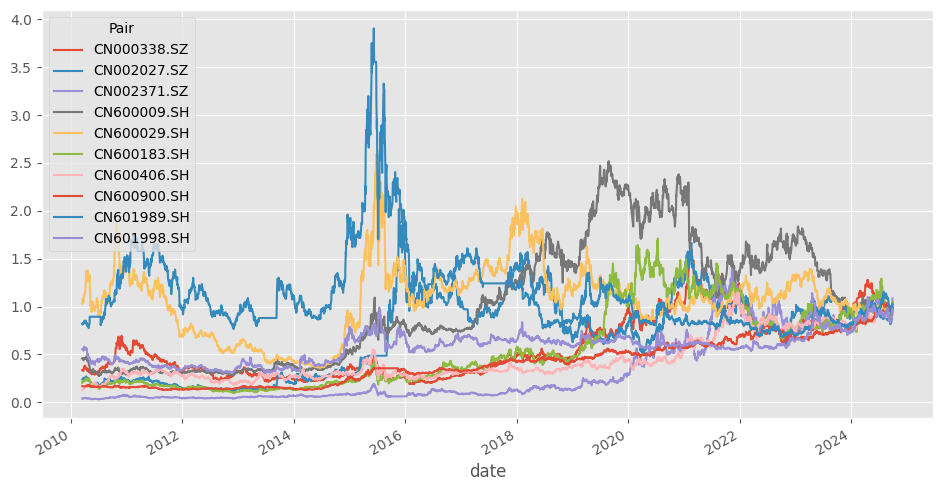

In [23]:
# View one day, normalized
data_window = df.copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Pair')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()

In [24]:
# # view timeseries
# plt.figure(figsize=(15,16))
# for i, d in enumerate(dfs):
#     name = d.name
#     x=d.dropna().index
#     y=[-i]*len(x)
#     plt.scatter(x,y,label=name[:20], s=1)
# plt.legend()

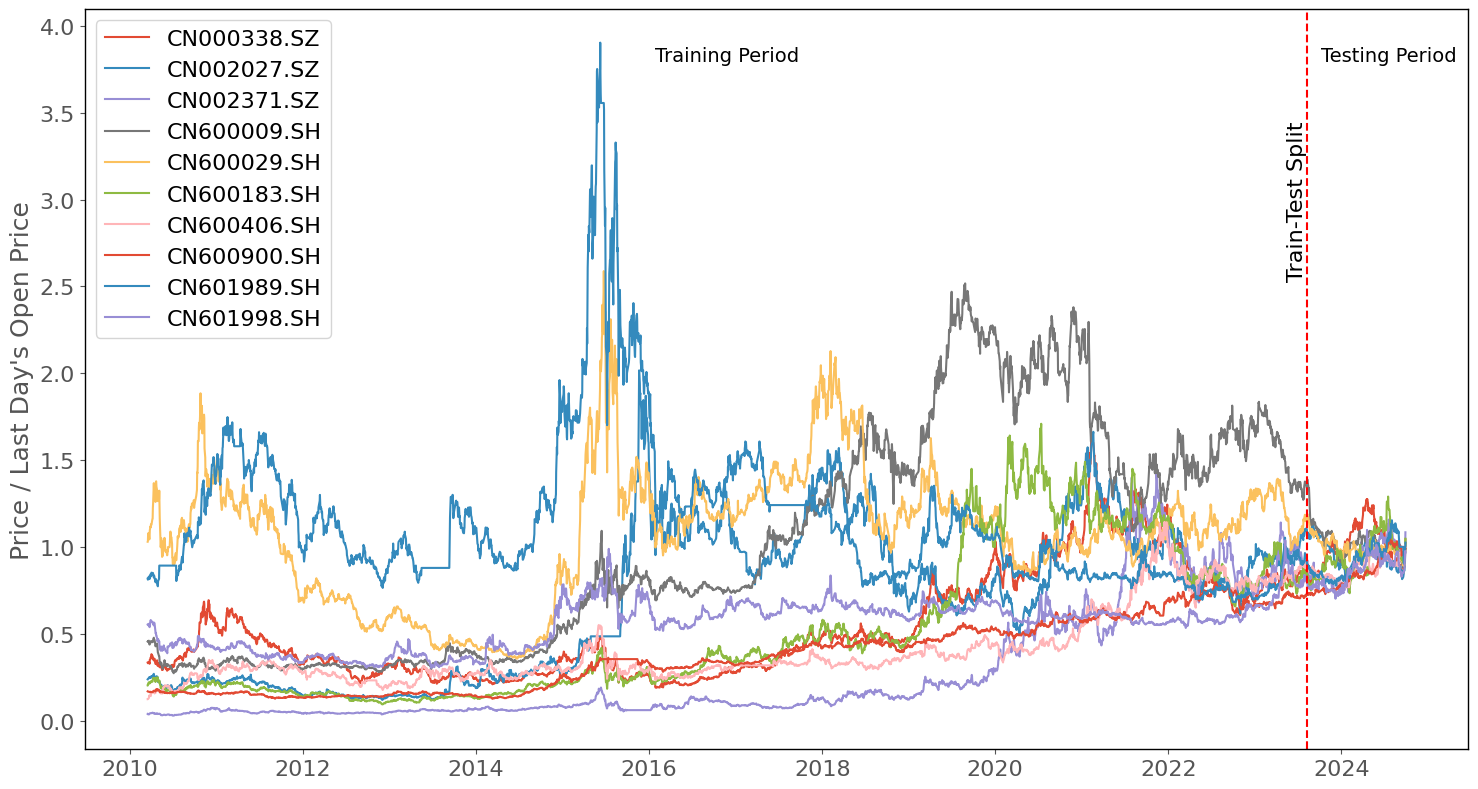

In [25]:
# 设置字体大小参数
LABEL_FONT_SIZE = 14  # 区间标签的字体大小
LEGEND_FONT_SIZE = 16 # 图例的字体大小
SPLIT_LABEL_FONT_SIZE = 16  # 分割线标签的字体大小
AXIS_LABEL_FONT_SIZE = 18  # 轴标签的字体大小
TICK_FONT_SIZE = 16  # 刻度标签的字体大小

# 准备归一化数据
data_window = df.copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Pair')
data_window = data_window.drop('open', axis=1, level='Price')

# 创建图形
fig, ax = plt.subplots(figsize=(15, 8))
plt.style.use('default')  # 使用默认样式
plt.grid(False)


# 设置背景颜色
ax.set_facecolor('white')  # 设置坐标轴区域背景为白色
fig.set_facecolor('white')  # 设置整个图形背景为白色
fig.patch.set_alpha(0.0)   # 设置图形背景透明度为0
ax.patch.set_alpha(0.0)    # 设置坐标轴区域背景透明度为0

# 添加边框
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# 可以设置边框颜色（可选）
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# 绘制归一化后的收盘价走势
data_window.xs('close', axis=1, level='Price').plot(ax=ax)

# 添加训练集-测试集分割线
split_date = pd.Timestamp('2023-08-07')  # 注意：这里设置分割的日期 (Note: Set the split date here)
ax.axvline(x=split_date, color='red', linestyle='--')

# 获取数据的时间索引并确保是排序的
time_index = data_window.index.sort_values()

# 获取训练集和测试集的日期范围
train_dates = time_index[time_index < split_date]
test_dates = time_index[time_index >= split_date]

# 计算训练集中点位置
train_period_center = train_dates[len(train_dates)//2]

# 计算Testing Period的位置
test_period_start = test_dates[0]
test_period_end = test_dates[-1]
# 将Testing Period位置设置在测试集中间偏右的位置
test_period_center = test_period_start + pd.Timedelta(days=60)  # 增加到60天，使标签更靠右

# 获取y轴范围
y_min, y_max = ax.get_ylim()
y_text_position = y_max - (y_max - y_min) * 0.05  # 将文本位置向下调整5%
split_text_position = y_max - (y_max - y_min) * 0.15  # 将分割线文本位置再向下调整

# 添加文本标注
ax.text(split_date, split_text_position, 'Train-Test Split', 
        rotation=90, verticalalignment='top', horizontalalignment='right',
        fontsize=SPLIT_LABEL_FONT_SIZE)
ax.text(train_period_center, y_text_position, 'Training Period', 
        horizontalalignment='center', verticalalignment='top',
        fontsize=LABEL_FONT_SIZE)
ax.text(test_period_center, y_text_position, 'Testing Period', 
        horizontalalignment='left', verticalalignment='top',
        fontsize=LABEL_FONT_SIZE)

# 设置图表标题和标签
# ax.set_title('Normalized Stock Prices with Train-Test Split')
ax.set_xlabel('')
ax.set_ylabel("Price / Last Day's Open Price", fontsize=AXIS_LABEL_FONT_SIZE)  # "Price Normalized by Final Open Price"

# 设置刻度标签字体大小、方向和对齐方式
ax.tick_params(axis='both', labelsize=TICK_FONT_SIZE)

# 获取当前x轴刻度位置和标签
locs, labels = plt.xticks()
# 重新设置标签，调整对齐方式和旋转角度
plt.setp(ax.get_xticklabels(), horizontalalignment='center', rotation=0)  # 添加rotation=0保持水平显示


# 将图例放在图形内左上角，设置字体大小
plt.legend(loc='upper left', fontsize=LEGEND_FONT_SIZE)

# 调整布局
plt.tight_layout()
plt.show()


In [26]:
%%capture
cd data

In [27]:
fig.savefig('./img/taining&testing_periods.svg', 
                      bbox_inches='tight',
                      dpi=300,
                      format='svg',
                      transparent=True)